In [1]:
pip install opendatasets --upgrade --quiet 

In [28]:
from os import SEEK_DATA
SEEK_DATA

3

In [78]:
import folium

In [2]:
import opendatasets as od

download_url= "https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents"

od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: hamidmadhoun
Your Kaggle Key: ··········


100%|██████████| 269M/269M [00:01<00:00, 143MB/s]


In [3]:
data_filename = "./us-accidents/US_Accidents_Dec21_updated.csv"

In [4]:
data_filename

'./us-accidents/US_Accidents_Dec21_updated.csv'

# US Accidents Exploratory Data Analysis

This dataset has been collected in real-time, using multiple Traffic APIs of accidents in the US.

It contains accident data collected from February 2016 to Dec 2021 for the Contiguous United States. Check here to learn more about this dataset.

- Data source: Kaggle
- Data timeframe: February 2016 to December 2021
- Data size: 2.8 million accident records
- Dataset does not include accidents from the city of New York.

# Data Preparation and Cleaning

We will first take the following steps:

1.  Load the file using Pandas
2.  Look at some information about the data & the dataset columns
3. Fix any missing or incorrect values or duplicated data

In [5]:
#we will first import the dataset using Pandas 
import pandas as pd

df= pd.read_csv(data_filename)

### Review our dataset

In [6]:
#let's review our dataset 
df.head(2)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night


It looks like we have 47 columns in our dataset

In [7]:
#let's check the dataset columns 

df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [8]:
#check number of rows

len(df)

2845342

In terms of number of rows we have 2,845,342 million rows in our dataset 

In [208]:
#Let's look at the statistical summary of the dataset using Pandas

df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,943318.000000,943318.000000,943318.000000,943318.000000,943318.000000,943318.000000,9.433180e+05,943318.000000,943318.000000,943318.000000,943318.000000,943318.000000,943318.000000,943318.000000
mean,2.064917,35.069960,-95.102568,35.070232,-95.102271,0.274626,7.924188e+03,63.833323,62.944833,64.544828,29.421216,9.201041,7.131648,0.004359
std,0.380617,5.796634,17.794343,5.796707,17.794098,0.883254,1.838707e+04,18.162256,19.773121,22.397021,1.022938,2.461330,5.412885,0.042675
min,1.000000,24.566027,-124.517744,24.566013,-124.509263,0.000000,0.000000e+00,-27.000000,-48.500000,1.000000,16.720000,0.000000,0.000000,0.000000
25%,2.000000,30.229957,-117.833342,30.230194,-117.833756,0.040000,1.274000e+03,51.000000,51.000000,49.000000,29.290000,10.000000,3.000000,0.000000
50%,2.000000,34.976113,-86.136779,34.976497,-86.137776,0.111000,4.001000e+03,66.000000,66.000000,66.000000,29.780000,10.000000,7.000000,0.000000
75%,2.000000,39.232680,-80.359477,39.232687,-80.358917,0.255000,9.467000e+03,78.000000,78.000000,83.000000,29.980000,10.000000,10.000000,0.000000
max,4.000000,48.996539,-67.484130,48.998144,-67.484130,112.968000,9.999997e+06,196.000000,196.000000,100.000000,58.160000,100.000000,1087.000000,9.990000


From the describe function we can observe a few things about our dataset:

1. Maximum and Minimum value for each column (example "Severity": 1-4)
2. Standard deviation value of each column (how far away from the mean)
3. The Quartile for each column 

In [10]:
#let's see how  many numerical columns we have in the dataset

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] 

numeric_df= df.select_dtypes(include=numerics)

len(numeric_df.columns)

14

Of the 47 columns that we have in our dataset, 14 columns are numerical data.

Note**

Numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] 

Those are the different generic numerical datatypes in python.
We created a list that included them so that we can test our dataset to see how many of those we have in our columns

### Check for Null values

In [13]:
#first let's see how many null values we have in total
df.isnull().sum().sum()

3414349

In [11]:
#we will list the columns in order from highest to lowest columns with missing values
df.isna().sum().sort_values(ascending=False)

Number                   1743911
Precipitation(in)         549458
Wind_Chill(F)             469643
Wind_Speed(mph)           157944
Wind_Direction             73775
Humidity(%)                73092
Weather_Condition          70636
Visibility(mi)             70546
Temperature(F)             69274
Pressure(in)               59200
Weather_Timestamp          50736
Airport_Code                9549
Timezone                    3659
Nautical_Twilight           2867
Civil_Twilight              2867
Sunrise_Sunset              2867
Astronomical_Twilight       2867
Zipcode                     1319
City                         137
Street                         2
Country                        0
Junction                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Turning_Loop                   0
Traffic_Signal                 0
Traffic_Calming                0
Stop                           0
Station                        0
Roundabout

We see that the most number of values missing is in the "number" columns following by Precipitation, and followed by Wind_Chill.

Followed by other columns as well.

Let's drop the null values from our dataset

it looks like we have 3,414,349 million null valuesin our dataset

In [209]:
#now let's drop the null values from ourdata

df.dropna(inplace=True)


In [15]:
#now let's verify that the nulll values were dropped
df.isnull().sum().sum()

0

Great! at this point we are sure that we have dropped all null values from our dataset.

### Check for Duplicated Values

In [16]:
#Let's check for any duplicated data

df[df.duplicated()]

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight


Great it looks like we don't have any duplicated data in our dataset 

### Fix incorrect datatypes

The following columns got incorrect datatype of "object" and we will change them "datetime" datatype

1.  End_Time 
2.  Start_Time 

In [34]:
#change 
df["End_Time"] = pd.to_datetime(df["End_Time"])
df["Start_Time"] = pd.to_datetime(df["Start_Time"])


In [18]:
#now let's verify the changes in our datatypes
df.End_Time
#now we can see the dataype for column End_Time as datetime64
# this is also true for the Start_Time column

42        2016-02-10 00:20:58
43        2016-02-10 00:20:58
47        2016-02-10 12:18:49
50        2016-02-10 14:35:27
66        2016-02-10 18:54:39
                  ...        
2845298   2019-08-23 16:48:04
2845302   2019-08-23 17:54:00
2845303   2019-08-23 17:54:00
2845304   2019-08-23 01:44:53
2845307   2019-08-23 11:01:40
Name: End_Time, Length: 943318, dtype: datetime64[ns]

# Exploratory Data Analysis and Visualization



### Check Columns Datatypes

Let's first check our dataset columns and choose a few columns to analyze.

In [35]:
#let's check the columns datatype and see if they are all correct
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943318 entries, 42 to 2845307
Data columns (total 47 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ID                     943318 non-null  object        
 1   Severity               943318 non-null  int64         
 2   Start_Time             943318 non-null  datetime64[ns]
 3   End_Time               943318 non-null  datetime64[ns]
 4   Start_Lat              943318 non-null  float64       
 5   Start_Lng              943318 non-null  float64       
 6   End_Lat                943318 non-null  float64       
 7   End_Lng                943318 non-null  float64       
 8   Distance(mi)           943318 non-null  float64       
 9   Description            943318 non-null  object        
 10  Number                 943318 non-null  float64       
 11  Street                 943318 non-null  object        
 12  Side                   943318 non-null  ob

We will choose the following columns to analyze:

1. City
2. Start time
4. Start LAt, Start Lng
 

Let's analyze columns one by one and ask some questions and draw some insights!

### City Column Analysis

In [47]:
#Let's first see what is the number of cities we have in our dataset
df.City

42                   Dunkirk
43                    Redkey
47                 Willshire
50         Cambridge Springs
66                 Cleveland
                 ...        
2845298             Pacifica
2845302            Yuba City
2845303            Yuba City
2845304       San Bernardino
2845307               Goleta
Name: City, Length: 943318, dtype: object

it looks like we have 943,318 city names in the dataset

In [49]:
#Let's see what is the unique number of cities we have in the dataset
cities= df.City.unique() #< first create a new df that contains only unique cities from the df
len(cities)  

8504

It looks like we have 8,504 unique cities in the dataset

In [48]:
#Let's sort the cities by the number of accidents from highest to lowest 
cities_by_accident = df.City.value_counts()
cities_by_accident

Miami                           67276
Orlando                         37644
Los Angeles                     20194
Houston                         18923
Charlotte                       16044
                                ...  
Asbury                              1
Prestonsburg                        1
Marble                              1
Intervale                           1
American Fork-Pleasant Grove        1
Name: City, Length: 8504, dtype: int64

In [50]:
#let's check the top 5 cities that had the most accidents
cities_by_accident[:5]

Miami          67276
Orlando        37644
Los Angeles    20194
Houston        18923
Charlotte      16044
Name: City, dtype: int64

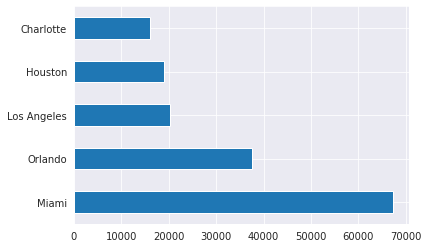

In [51]:
#let's plot the top 5 cities with the highest accidents
cities_by_accident[:5].plot(kind="barh")

In this section, we were able to identify and write codes to help know which cities have the most and which have the least number of accidents.

This information along with other information analyzed can help us paint a picture for the dataset.

### Start Time Column Analysis

Here we will analyze the "Start_Time" column of the dataset.

The Start_Time shows the start time of accident in local time zone.

In [219]:
#let's look at the number of accidents at different hours of the day

df.Start_Time.dt.hour #< from the Start_Time column we will focus on the hour values of each datetime 

42         18
43         18
47          6
50          8
66         12
           ..
2845298    16
2845302    17
2845303    17
2845304     1
2845307    10
Name: Start_Time, Length: 943318, dtype: int64

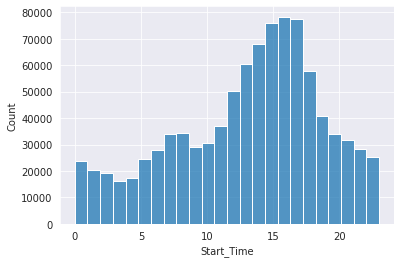

In [218]:
#here we will plot the number accidents by the hour of the day
sns.histplot(df.Start_Time.dt.hour, bins=24)

This histogram plots the number of accidents at different time of the day broken down into 24 hour intervals.

Where 0 represents 12:00 am and 23 is 11:00 PM.

Here we can see that most number accidents occured roughly between 11 am and 6pm and peaked at 3,4,5.

On the other hand, the lowest number of accidents happen in early in the morning from 12:am to 9:00 AM with some variations between 7 am and 8 am.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


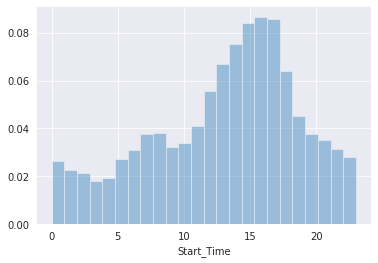

In [220]:
#Another distribution that will show the percentage of number of accidents by time of the day
sns.distplot(df.Start_Time.dt.hour, bins=24, kde=False, norm_hist=True)

in this distribution plot, we have the **percentage** of the number of accidents that happened in a day plotted in hourly intervals, 24 hours a day.

- A high percentage of accidents occur between 11 am to 6 pm
- A low percentage of accidents occur early in the morning around 12:am to 9:00 am roughly

Now we will analyze the number of accidents occured by **day** instead of by hour.

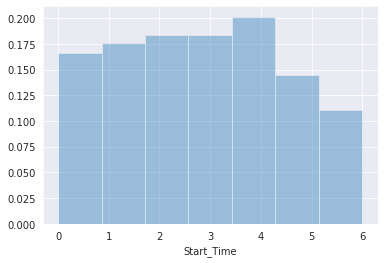

In [58]:
#this plot will show the number of accidents happened for each day of the week
sns.distplot(df.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist=True)

Here we look at the number of accidents for each day of the week, where 0 represents Monday and 6 Represents Sunday.

Here we see that more accidents occur during weekdays and fewer accidents occur during weekends.

We see more accidents occur on Friday and fewer accidents occurred on Sunday.

But is the distribution of accidents by **hour** of the day the same on a weekend day as on a weekday?

in the next section, we will compare the number of accidents in a day on an hourly basis for a Sunday and another comparison for a Monday and see if the distribution is similar

Let's check it out!

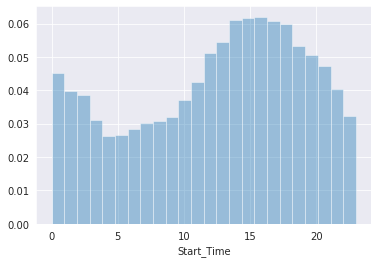

In [60]:
#will create a new dataframe that includes only accidents from "sunday" 

sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]

sns.distplot(sundays_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

For Sunday we surprisingly see a high number of accidents happening early in the morning from 12:00 to 3:0 am and then again the peak from 12:00 pm to 8:00 pm.

Let's check how the distribution is for the number of accidents on a Monday

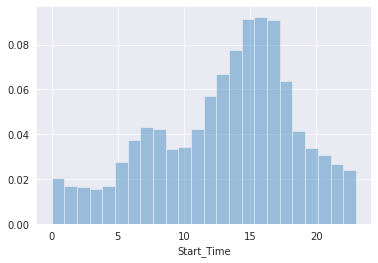

In [61]:
#let's compare the trend of accidents for hours on mondays
mondays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]

sns.distplot(mondays_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

Surprisingly different, the number of peak accidents doesn't happen early in the morning like on a Sunday.

The highest number of accidents happen around 12:00 pm to 6 pm, which can be seen around lunch time, rush hour and when people are leaving work.

Let's analyze the number of accidents by **Month** and see the trend



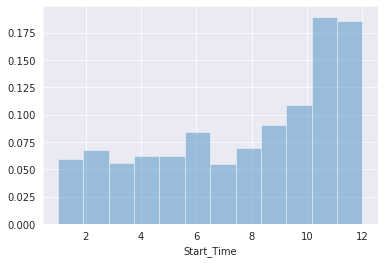

In [62]:
#here we will plot the number of accidents that occured per month
sns.distplot(mondays_start_time.dt.month, bins=12, kde=False, norm_hist=True)

This graph distributes the number of accidents by month where 1 represents the month of January and 12 is the month of December.

it looks like more accidents are happening in October, November and December.

Fewer accidents are happening in the summertime and more during winter time.

important notes to keep in mind:

1. much data is missing for 2016 and maybe even 2017
2. Data does not include values from the City of New York

###  Start Lat, Start Lng Column Analysis

Start_Lat: 
Shows latitude in GPS coordinate of the start point.

Start_Lng: 
Shows longitude in GPS coordinate of the start point.

In [69]:
#let's review the Start_Lat column
df.Start_Lat

42         40.451120
43         40.354290
47         40.728130
50         41.831930
66         41.483390
             ...    
2845298    37.609816
2845302    38.995930
2845303    39.003170
2845304    34.121320
2845307    34.485189
Name: Start_Lat, Length: 943318, dtype: float64

In [70]:
#let's review the Start_Lng column
df.Start_Lng

42         -85.150480
43         -85.149930
47         -84.789650
50         -80.101430
66         -81.662970
              ...    
2845298   -122.493720
2845302   -121.672020
2845303   -121.662679
2845304   -117.254540
2845307   -120.229276
Name: Start_Lng, Length: 943318, dtype: float64

Because the dataset is huge it will be inefficient and time-consuming to visualize the entire dataset.

Instead, we will take a 10% sample and build a scatterplot around it to have a quick peak of what's going on.

In [72]:
#we first will create a new sample df containing only 10% of the dataset

sample_df= df.sample(int(0.1 * len(df)))


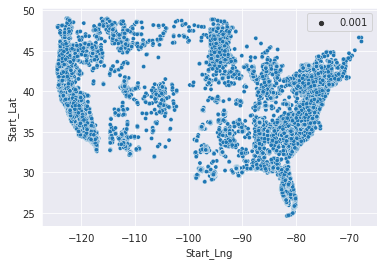

In [73]:
#let's build a scatter plot using a 10% samlpe of our dataset
sns.scatterplot(x=sample_df.Start_Lng, y=sample_df.Start_Lat, size=0.001 )

We will use folium library to show a heatmap of where most accidents are taking place in a map.



In [74]:
#we will first import folium library
import folium

In [80]:
from folium import plugins
from folium.plugins import HeatMap

In [79]:
zip (list(df.Start_Lng), list(df.Start_Lat))

In [81]:
sample_df= df.sample(int(0.001* len (df)))
lat_lang_pairs= list(zip (list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

In [83]:
#let's take a sample of 1% of the dataset and build a heatmap of it
map = folium.Map()

HeatMap(lat_lang_pairs).add_to(map)
map

you can zoom in on the map and see if your state or city has some of the highest or lowest numbers of accidents if you live in the US.

# Ask and Answer Questions

1. Which are the 5 states that had the highest number of accidents?
2. which day of the week had the highest number of accidents?
3. which month had the highest and which had the lowest number of accidents?
4. What is the average number of sever accidents?
5. Which state had the highest and which had the lowest number of sever accidents?

In [95]:
#which 5 states have the highest number of accidents?
states_by_accident = df.State.value_counts()
states_by_accident[:5]

FL    217566
CA    215629
SC     57481
TX     52073
PA     48470
Name: State, dtype: int64

## 1- The 5 states with the highest number of accidents are:
1. Florida
2. California
3. South Carolina 
4. Texas
5. Pennsylvania

## 2- Which day of the week have the most accidents?





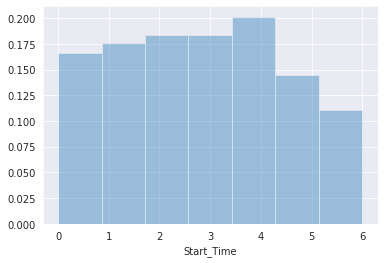

In [221]:
sns.distplot(df.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist=True)


In [222]:
days_of_the_week = df.Start_Time.dt.dayofweek
days_of_the_week.value_counts()

4    162753
2    148520
3    148505
1    142507
0    134229
5    117344
6     89460
Name: Start_Time, dtype: int64

As we see, **Friday** has the highest number of accidents 162,753 and **Sunday** has the least number of accidents  89,460 

## 3- Which months have had the most and least number of accidents?

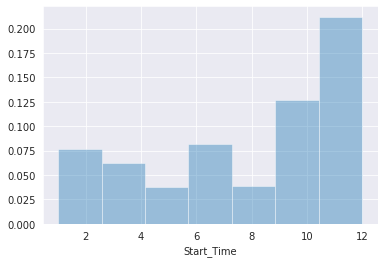

In [119]:
#will plot the number of accidents occurred per month
sns.distplot(df.Start_Time.dt.month, bins=7, kde=False, norm_hist=True)


In [120]:
#will sort the number of accidents by month from highest to lowest 
by_month.value_counts()

12    175983
11    138527
10    104994
9      83090
6      73645
1      58736
8      57344
5      55293
2      54365
4      51594
7      48389
3      41358
Name: Start_Time, dtype: int64

Ae we can see that the highest number of accidents occurred in **December** and the lowest number of accidents occurred in **March**.

## 4- What is the average number of severe accidents?

Severe accidents:
Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay

In [124]:
#the average number of sever accidents that happened between the dataset time frame is 2
df["Severity"].mean()

2.0649166028847112

## 5- in which State did most of the severe accidents take place?

In [206]:
df.sort_values(by=["Severity","State"], ascending=False)[["Severity", "State"]][10:]

,Severity,State
2366584,4,WY
2366585,4,WY
2435715,4,WY
2448196,4,WY
2448197,4,WY
...,...,...
2223911,1,AL
2243256,1,AL
2258989,1,AL
2268589,1,AL


The state which had the most severe accidents is Wyoming while Alabama had the least number of severe accidents.

# Summary and Conclusion

Summary
After analyzing a few columns in the dataset we came up with a few insights about car accidents in the US.

The five highest states that had the most number of accidents were:
1. Florida
2. California
3. South Carolina
4. Texas
5. Pennsylvania

When we look at which day of the week had the most number of accidents that would be Friday with 162,753 accidents.

The least accidents happened on a Sunday with only 89,460 accidents.

in terms of analyzing the trends of accidents in different months, we see that January had the most number of accidents with 175,983.

While March had the least number of accidents with 41,358 accidents.

Of all the accidents there was an average of 2.06 severe accidents occurred and the state with the most severe accidents was Wyoming.

While Alabama had the lowest number of severe accidents.

Note:
The dataset did not include any data from the city of New York.